## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
#!pip install nlp

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])  
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [5]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [6]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']

In [7]:
def get_tweet(data):
  text = [x['text'] for x in data]
  label =[x['label'] for x in data]
  return text, label

In [8]:
tweets, labels = get_tweet(train)

In [10]:
tweets[:10], labels[:10]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 ['sadness',
  'sadness',
  'anger',
  'love',
  'anger',
  'sadness',
  'surprise',
  'fear',
  'joy',
  'love'])

## Task 4: Tokenizer

1. Tokenizing the tweets

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
tokenizer = Tokenizer(num_words= 10000, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)

In [16]:
tweets[0]

'i didnt feel humiliated'

In [15]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [17]:
lengths = [len(tweet) for tweet in tweets]

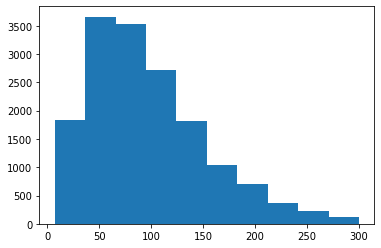

In [20]:
plt.hist(lengths);

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating= 'post', padding= 'post', maxlen= 50)
  return padded


In [25]:
padded_train_seq = get_sequences(tokenizer, tweets)
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [27]:
classes = set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


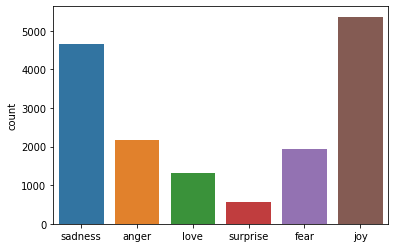

In [34]:
import seaborn as sns
sns.countplot(labels);

In [35]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items() )

In [36]:
class_to_index

{'anger': 1, 'fear': 3, 'joy': 4, 'love': 2, 'sadness': 5, 'surprise': 0}

In [37]:
index_to_class

{0: 'surprise', 1: 'anger', 2: 'love', 3: 'fear', 4: 'joy', 5: 'sadness'}

In [38]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [40]:
train_labels = names_to_ids(labels)

In [41]:
train_labels

array([5, 5, 1, ..., 4, 1, 5])

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [53]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(10000, 16, input_length= 50),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences= True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    tf.keras.layers.Dense(6, activation = 'softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [55]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [57]:
h = model.fit(padded_train_seq, train_labels,
              validation_data = (val_seq, val_labels),
              epochs= 20,
              callbacks = [
                           tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience = 2)
              ])

Epoch 1/20
500/500 [==============================] - 30s 59ms/step - loss: 1.0100 - accuracy: 0.6120 - val_loss: 0.6658 - val_accuracy: 0.7535
Epoch 2/20
500/500 [==============================] - 28s 57ms/step - loss: 0.4383 - accuracy: 0.8524 - val_loss: 0.5463 - val_accuracy: 0.8385
Epoch 3/20
500/500 [==============================] - 28s 57ms/step - loss: 0.2685 - accuracy: 0.9193 - val_loss: 0.4336 - val_accuracy: 0.8660
Epoch 4/20
500/500 [==============================] - 29s 57ms/step - loss: 0.2005 - accuracy: 0.9396 - val_loss: 0.4177 - val_accuracy: 0.8720
Epoch 5/20
500/500 [==============================] - 28s 56ms/step - loss: 0.1548 - accuracy: 0.9526 - val_loss: 0.5171 - val_accuracy: 0.8425
Epoch 6/20
500/500 [==============================] - 28s 57ms/step - loss: 0.1318 - accuracy: 0.9575 - val_loss: 0.4023 - val_accuracy: 0.8855
Epoch 7/20
500/500 [==============================] - 28s 56ms/step - loss: 0.0991 - accuracy: 0.9707 - val_loss: 0.4095 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

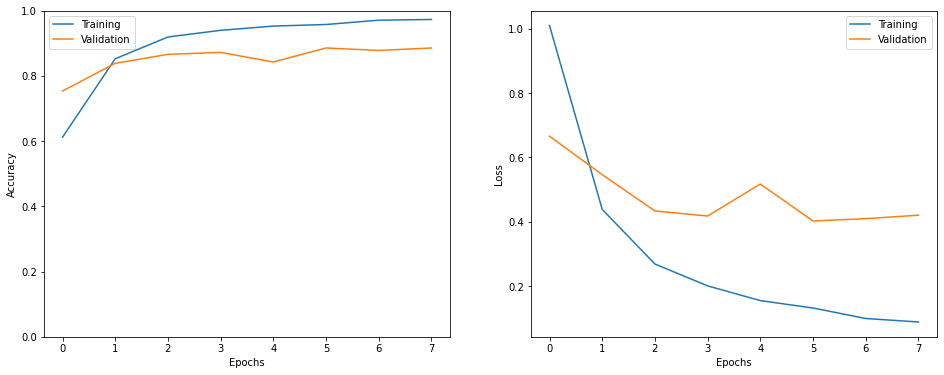

In [58]:
show_history(h)

In [61]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [62]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 20ms/step - loss: 0.3837 - accuracy: 0.8895


In [67]:
i = random.randint(0, len(test_labels)- 1)
p = model.predict(np.expand_dims(test_seq[i], axis = 0))
pred_class = index_to_class[np.argmax(p).astype('uint8')]

In [68]:
print('Sentence: ', test_tweets[i])
print('Emotion: ', index_to_class[test_labels[i]])
print('Predicted Emotion: ', pred_class)

Sentence:  i havent been sick in the winter very often since i quit smoking years ago so seldom in fact that now when i do get sick i feel outraged hows that for rational thinking
Emotion:  anger
Predicted Emotion:  anger


In [73]:
preds = model.predict(test_seq)
preds =np.argmax(preds, axis=1)


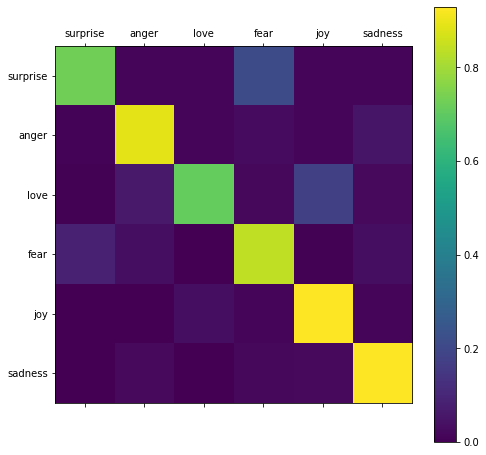

In [74]:
show_confusion_matrix(test_labels, preds, list(classes))